# PyTorch Lesson 2: Simple models

In [1]:
import torch
import math

class bcols:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

torch.__version__

'1.12.0+cu102'

In [2]:
torch.manual_seed(55)
x = torch.randn(10,3)
x

tensor([[ 1.8616,  0.9035,  1.3395],
        [ 1.2005,  1.0070,  0.2379],
        [-0.4197,  0.5358, -0.3831],
        [ 2.1767,  0.9645,  0.4847],
        [-1.7431, -1.1125,  0.2744],
        [ 1.4430, -0.7003,  1.0439],
        [ 0.0991, -1.0988,  0.0574],
        [ 0.8928, -0.0457, -1.3869],
        [-0.5205,  0.7984, -0.5957],
        [-0.6574,  0.6536,  0.9329]])

In [3]:
x.size()
# x.shape

torch.Size([10, 3])

In [4]:
n = x.size(dim=0)
d = x.size(dim=1)
print(f"n = {n}, d = {d}.")

n = 10, d = 3.


# Linear model (or layer)

In [5]:
from torch import nn

lin = nn.Linear(in_features=d, out_features=1)
lin

Linear(in_features=3, out_features=1, bias=True)

This implements the linear function:
$$
f_{w,b}(x) = x^T w + b
$$
where $x, w \in \mathbb R^d$ and $b$ is a scalar. Parameters $w$ and $b$ can be optimized.

In [6]:
lin(x)

tensor([[ 1.7081],
        [ 0.7950],
        [-0.1547],
        [ 1.3566],
        [-0.0509],
        [ 1.6605],
        [ 0.6123],
        [-0.0450],
        [-0.3641],
        [ 0.4531]], grad_fn=<AddmmBackward0>)

In [7]:
lin(x[3,:])

tensor([1.3566], grad_fn=<AddBackward0>)

## Indirect way of finding out $w$ and $b$

In [8]:
xtest = torch.cat([torch.zeros(1,d), torch.eye(d)], dim=0)
xtest

tensor([[0., 0., 0.],
        [1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [9]:
w = lin(xtest)
w

tensor([[0.3359],
        [0.7627],
        [0.1518],
        [0.8913]], grad_fn=<AddmmBackward0>)

In [10]:
w[1:]  = w[1:] - w[0]
w

tensor([[ 0.3359],
        [ 0.4268],
        [-0.1841],
        [ 0.5554]], grad_fn=<CopySlices>)

In [11]:
torch.cat([torch.ones(n,1), x], dim=1)

tensor([[ 1.0000,  1.8616,  0.9035,  1.3395],
        [ 1.0000,  1.2005,  1.0070,  0.2379],
        [ 1.0000, -0.4197,  0.5358, -0.3831],
        [ 1.0000,  2.1767,  0.9645,  0.4847],
        [ 1.0000, -1.7431, -1.1125,  0.2744],
        [ 1.0000,  1.4430, -0.7003,  1.0439],
        [ 1.0000,  0.0991, -1.0988,  0.0574],
        [ 1.0000,  0.8928, -0.0457, -1.3869],
        [ 1.0000, -0.5205,  0.7984, -0.5957],
        [ 1.0000, -0.6574,  0.6536,  0.9329]])

In [12]:
nn.ConstantPad1d((1,0),1)(x)
# nn.ConstantPad1d((1,-1),1.2)(x)

tensor([[ 1.0000,  1.8616,  0.9035,  1.3395],
        [ 1.0000,  1.2005,  1.0070,  0.2379],
        [ 1.0000, -0.4197,  0.5358, -0.3831],
        [ 1.0000,  2.1767,  0.9645,  0.4847],
        [ 1.0000, -1.7431, -1.1125,  0.2744],
        [ 1.0000,  1.4430, -0.7003,  1.0439],
        [ 1.0000,  0.0991, -1.0988,  0.0574],
        [ 1.0000,  0.8928, -0.0457, -1.3869],
        [ 1.0000, -0.5205,  0.7984, -0.5957],
        [ 1.0000, -0.6574,  0.6536,  0.9329]])

In [13]:
nn.ConstantPad1d((1,0),1)(x) @ w

tensor([[ 1.7081],
        [ 0.7950],
        [-0.1547],
        [ 1.3566],
        [-0.0509],
        [ 1.6605],
        [ 0.6123],
        [-0.0450],
        [-0.3641],
        [ 0.4531]], grad_fn=<MmBackward0>)

In [14]:
torch.cat([nn.ConstantPad1d((1,0),1)(x) @ w, lin(x)], dim=1)

tensor([[ 1.7081,  1.7081],
        [ 0.7950,  0.7950],
        [-0.1547, -0.1547],
        [ 1.3566,  1.3566],
        [-0.0509, -0.0509],
        [ 1.6605,  1.6605],
        [ 0.6123,  0.6123],
        [-0.0450, -0.0450],
        [-0.3641, -0.3641],
        [ 0.4531,  0.4531]], grad_fn=<CatBackward0>)

## Direct way of finding out $w$ and $b$

In [15]:
lin.weight, lin.bias, w

(Parameter containing:
 tensor([[ 0.4268, -0.1841,  0.5554]], requires_grad=True),
 Parameter containing:
 tensor([0.3359], requires_grad=True),
 tensor([[ 0.3359],
         [ 0.4268],
         [-0.1841],
         [ 0.5554]], grad_fn=<CopySlices>))

In [16]:
list(lin.parameters())

[Parameter containing:
 tensor([[ 0.4268, -0.1841,  0.5554]], requires_grad=True),
 Parameter containing:
 tensor([0.3359], requires_grad=True)]

In [17]:
for param in lin.parameters():
    print('-',param)

- Parameter containing:
tensor([[ 0.4268, -0.1841,  0.5554]], requires_grad=True)
- Parameter containing:
tensor([0.3359], requires_grad=True)


## Fitting the linear model by graident descent 
Consider the model 
\begin{align}
y_i &= f^*(x_i), \quad i=1,\dots,n \\
f^*(x) &= x^T w^*  + b^*
\end{align}

In [18]:
ws = torch.tensor([-1, 1, math.pi, 0.1])
ws

tensor([-1.0000,  1.0000,  3.1416,  0.1000])

In [19]:
ws = ws[:,None]
ws

tensor([[-1.0000],
        [ 1.0000],
        [ 3.1416],
        [ 0.1000]])

In [20]:
y = nn.ConstantPad1d((1,0),1)(x) @ ws
y

tensor([[ 3.8341],
        [ 3.3878],
        [ 0.2253],
        [ 4.2553],
        [-6.2107],
        [-1.6525],
        [-4.3472],
        [-0.3893],
        [ 0.9282],
        [ 0.4892]])

We would like to solve the following optimization 
$$
\min_{w, b} \frac1n \sum_{i=1}^n (y_i - f_{w,b}(x_i))^2
$$

In [21]:
lin = nn.Linear(in_features=d, out_features=1)
optim = torch.optim.SGD([lin.weight, lin.bias], lr=.1)

loss = sum((y-lin(x))**2)/n

print(lin.weight.grad)
loss.backward()
print(lin.weight.grad)

None
tensor([[-3.9405, -4.5483, -0.7785]])


In [22]:
print(lin.weight)
optim.step()
print(lin.weight)

Parameter containing:
tensor([[ 0.5634,  0.0722, -0.0549]], requires_grad=True)
Parameter containing:
tensor([[0.9574, 0.5270, 0.0230]], requires_grad=True)


In [23]:
print(lin.weight.grad)
optim.zero_grad()
print(lin.weight.grad)

tensor([[-3.9405, -4.5483, -0.7785]])
tensor([[0., 0., 0.]])


In [24]:
lin = nn.Linear(in_features=d, out_features=1)
optim = torch.optim.SGD([lin.weight, lin.bias], lr=.1)

for i in range(101):
    optim.zero_grad()               # zeros out lin.weight.grad and lin.bias.grad
    loss = sum((y - lin(x))**2)/n 
    loss.backward()                 # updates lin.weight.grad and lin.bias.grad
    optim.step()                    # updates lin.weight and lin.bias
    if i % 20 == 0: 
         print(f"- i = {bcols.OKBLUE}{i}{bcols.ENDC}, loss = {bcols.WARNING}{loss.item():1.2e}{bcols.ENDC},\n{lin.weight}")

- i = 0, loss = 1.44e+01,
Parameter containing:
tensor([[0.1741, 0.4467, 0.0595]], requires_grad=True)
- i = 20, loss = 4.89e-02,
Parameter containing:
tensor([[1.0835, 2.8909, 0.0421]], requires_grad=True)
- i = 40, loss = 7.81e-04,
Parameter containing:
tensor([[1.0141, 3.1111, 0.0861]], requires_grad=True)
- i = 60, loss = 1.49e-05,
Parameter containing:
tensor([[1.0020, 3.1376, 0.0976]], requires_grad=True)
- i = 80, loss = 2.94e-07,
Parameter containing:
tensor([[1.0003, 3.1411, 0.0996]], requires_grad=True)
- i = 100, loss = 5.86e-09,
Parameter containing:
tensor([[1.0000, 3.1415, 0.0999]], requires_grad=True)


In [25]:
lin.bias, lin.weight, ws

(Parameter containing:
 tensor([-1.0000], requires_grad=True),
 Parameter containing:
 tensor([[1.0000, 3.1415, 0.0999]], requires_grad=True),
 tensor([[-1.0000],
         [ 1.0000],
         [ 3.1416],
         [ 0.1000]]))

# A single Neuron
Consider the simplest neural network, a simple neorn:
$$
f_{w,b}(x) = \sigma(x^T w + b)
$$
where $x, w \in \mathbb R^d$ and $b$ is a scalar. Parameters $w$ and $b$ can be optimized.

$\sigma(\cdot)$ is a nonlinear function, mapping $\mathbb R$ to $\mathbb R$.

In [26]:
sig = nn.ReLU() # Rectified Linear Unit
sig

ReLU()

$\sigma(x) = \max(0,x)$

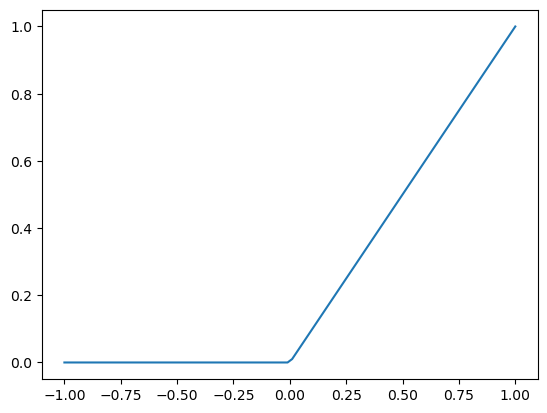

In [27]:
import matplotlib.pyplot as plt

z = torch.linspace(-1, 1, 100)
plt.plot(z, sig(z));

## Recreate the data from the actual model
Let's recreate $y_i$ as the output of a neuron rather than just a linear model: 
$$y_i = \sigma(x_i^T w^* + b^*), \quad  i =1,\dots,n$$

In [28]:
y = sig(nn.ConstantPad1d((1,0),1)(x) @ ws)
y

tensor([[3.8341],
        [3.3878],
        [0.2253],
        [4.2553],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.9282],
        [0.4892]])

## Training a neuron v1

In [29]:
torch.manual_seed(11)
#torch.manual_seed(115)
lin = nn.Linear(in_features=d, out_features=1)
sig = nn.ReLU()

optim = torch.optim.SGD([lin.weight, lin.bias], lr=.1)

for i in range(5001):
    optim.zero_grad()               # zeros out lin.weight.grad and lin.bias.grad
    loss = sum((y - sig(lin(x)))**2)/n 
    loss.backward()                 # updates lin.weight.grad and lin.bias.grad
    optim.step()                    # updates lin.weight and lin.bias
    if i % 1000 == 0: 
         print(f"- i = {bcols.OKBLUE}{i}{bcols.ENDC}, loss = {bcols.WARNING}{loss.item():1.2e}{bcols.ENDC},\n{lin.weight}")

- i = 0, loss = 4.55e+00,
Parameter containing:
tensor([[-0.3892, -0.0033,  0.5598]], requires_grad=True)
- i = 1000, loss = 5.10e-04,
Parameter containing:
tensor([[1.0385, 2.8389, 0.0878]], requires_grad=True)
- i = 2000, loss = 1.25e-04,
Parameter containing:
tensor([[1.0191, 2.9917, 0.0940]], requires_grad=True)
- i = 3000, loss = 3.06e-05,
Parameter containing:
tensor([[1.0094, 3.0674, 0.0970]], requires_grad=True)
- i = 4000, loss = 7.51e-06,
Parameter containing:
tensor([[1.0047, 3.1049, 0.0985]], requires_grad=True)
- i = 5000, loss = 1.84e-06,
Parameter containing:
tensor([[1.0023, 3.1234, 0.0993]], requires_grad=True)


## Training a neuron v2
Using `nn.Seqeuntial` to form a function composition.

In [30]:
torch.manual_seed(11)
lin = nn.Linear(in_features=d, out_features=1)
sig = nn.ReLU()
neuron = nn.Sequential(lin, sig)

# optim = torch.optim.SGD([lin.weight, lin.bias], lr=.1)
optim = torch.optim.SGD(neuron.parameters(), lr=.1)

for i in range(5001):
    optim.zero_grad()               # zeros out lin.weight.grad and lin.bias.grad
    loss = sum((y - neuron(x))**2)/n 
    loss.backward()                 # updates lin.weight.grad and lin.bias.grad
    optim.step()                    # updates lin.weight and lin.bias
    if i % 1000 == 0: 
          print(f"- i = {bcols.OKBLUE}{i}{bcols.ENDC}, loss = {bcols.WARNING}{loss.item():1.2e}{bcols.ENDC},\n{lin.weight}")

- i = 0, loss = 4.55e+00,
Parameter containing:
tensor([[-0.3892, -0.0033,  0.5598]], requires_grad=True)
- i = 1000, loss = 5.10e-04,
Parameter containing:
tensor([[1.0385, 2.8389, 0.0878]], requires_grad=True)
- i = 2000, loss = 1.25e-04,
Parameter containing:
tensor([[1.0191, 2.9917, 0.0940]], requires_grad=True)
- i = 3000, loss = 3.06e-05,
Parameter containing:
tensor([[1.0094, 3.0674, 0.0970]], requires_grad=True)
- i = 4000, loss = 7.51e-06,
Parameter containing:
tensor([[1.0047, 3.1049, 0.0985]], requires_grad=True)
- i = 5000, loss = 1.84e-06,
Parameter containing:
tensor([[1.0023, 3.1234, 0.0993]], requires_grad=True)


In [31]:
for param in neuron.parameters():
    print(param)

Parameter containing:
tensor([[1.0023, 3.1234, 0.0993]], requires_grad=True)
Parameter containing:
tensor([-0.9863], requires_grad=True)


## Training a neuron v3
Encapsulating the model in a class, by defining a sub-class of `nn.Module`.

In [32]:
class Neuron(nn.Module):
    def __init__(self):
        super().__init__()
        self.simple_neuron = nn.Sequential(
            nn.Linear(in_features=d, out_features=1),
            nn.ReLU()
        )
    def forward(self,x):  # This is called when we apply the object like a function 
        print("Forward pass not implemented!")


model = Neuron()
model(x)

Forward pass not implemented!


In [33]:
torch.manual_seed(11)

class Neuron(nn.Module):
    def __init__(self):
        super().__init__()
        self.simple_neuron = nn.Sequential(
            nn.Linear(in_features=d, out_features=1),
            nn.ReLU()
        )
    def forward(self,x):
        return self.simple_neuron(x)


model = Neuron()
model(x)

tensor([[0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.4946],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.3965]], grad_fn=<ReluBackward0>)

In [34]:
optim = torch.optim.SGD(model.parameters(), lr=.1)

for i in range(5001):
    optim.zero_grad()               # zeros out lin.weight.grad and lin.bias.grad
    loss = sum((y - model(x))**2)/n 
    loss.backward()                 # updates lin.weight.grad and lin.bias.grad
    optim.step()                    # updates lin.weight and lin.bias
    if i % 1000 == 0: 
         print(f"- i = {bcols.OKBLUE}{i}{bcols.ENDC}, loss = {bcols.WARNING}{loss.item():1.2e}{bcols.ENDC},\n{lin.weight}")

- i = 0, loss = 4.55e+00,
Parameter containing:
tensor([[1.0023, 3.1234, 0.0993]], requires_grad=True)
- i = 1000, loss = 5.10e-04,
Parameter containing:
tensor([[1.0023, 3.1234, 0.0993]], requires_grad=True)
- i = 2000, loss = 1.25e-04,
Parameter containing:
tensor([[1.0023, 3.1234, 0.0993]], requires_grad=True)
- i = 3000, loss = 3.06e-05,
Parameter containing:
tensor([[1.0023, 3.1234, 0.0993]], requires_grad=True)
- i = 4000, loss = 7.51e-06,
Parameter containing:
tensor([[1.0023, 3.1234, 0.0993]], requires_grad=True)
- i = 5000, loss = 1.84e-06,
Parameter containing:
tensor([[1.0023, 3.1234, 0.0993]], requires_grad=True)


# Putting the optimization/training code into a function

In [39]:
import numpy as np

def print_optim_stats(i, loss):
    print(f"- i = {bcols.OKBLUE}{i}{bcols.ENDC}, loss = {bcols.WARNING}{loss.item():1.2e}{bcols.ENDC}")

# optimize a model w.r.t. the MSE loss
def train(x, y, model, lr, niter = 100):
    optim = torch.optim.SGD(model.parameters(), lr=lr)

    loss_record = np.zeros(niter)
    n, _ = x.shape
    for i in range(niter):
        optim.zero_grad()               # zeros out model.parameters()'s grads
        loss = sum((y - model(x))**2)/n 
        loss_record[i] = loss.item()    # record the loss
        loss.backward()                 # updates model.parameters()'s grads
        optim.step()                    # updates model.parameters()
        if i % round(niter / 5) == 0: 
            print_optim_stats(i, loss)            

    print_optim_stats(i, loss)
    return loss_record

loss_rec = train(x, y, model, 0.1, 100)

- i = 0, loss = 1.90e-02
- i = 20, loss = 1.54e-02
- i = 40, loss = 1.27e-02
- i = 60, loss = 1.05e-02
- i = 80, loss = 8.72e-03
- i = 99, loss = 7.33e-03


## Training a neuron v4
Using the functional form of ReLU.

In [48]:
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(11)

class Neuron(nn.Module):
    def __init__(self):
        super().__init__()
        # self.simple_neuron = nn.Sequential(
        #     nn.Linear(in_features=d, out_features=1),
        #     nn.ReLU()
        # )

        self.lin = nn.Linear(in_features=d, out_features=1)

    def forward(self,x):
        # return self.simple_neuron(x)
    
        return F.relu(self.lin(x))


model = Neuron()
# model(x)
list(model.parameters())

[Parameter containing:
 tensor([[-0.4053, -0.0155,  0.5608]], requires_grad=True),
 Parameter containing:
 tensor([-0.3829], requires_grad=True)]

In [49]:
print(type(nn.ReLU()))
print(type(F.relu))

<class 'torch.nn.modules.activation.ReLU'>
<class 'function'>


- i = 0, loss = 4.55e+00
- i = 20, loss = 4.52e+00
- i = 40, loss = 4.23e-01
- i = 60, loss = 7.74e-02
- i = 80, loss = 3.06e-02
- i = 99, loss = 1.93e-02


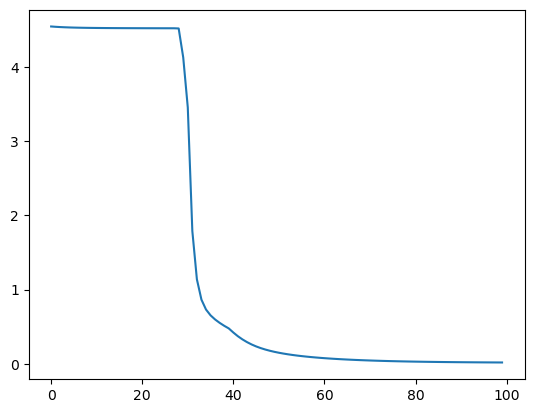

In [50]:
import matplotlib.pylab as plt

loss_rec = train(x, y, model, 0.1, 100)
plt.plot(loss_rec)